## Tworzenie grafów

### Wierzchołki

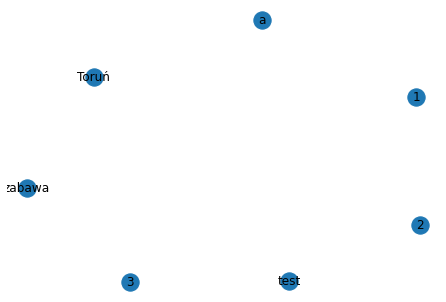

In [146]:
import networkx as nx
import random as r
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
G = nx.Graph() #tworzenie obiektu grafu
G.add_node('a')
G.add_node(1,weight=5)
G.add_nodes_from(['test','zabawa','Toruń',2,3])
#nx.draw(G) #rysowanie aktualnego stanu grafu G, także nx.draw_networkx(G)
nx.draw(G,with_labels=True)

In [68]:
list(G.nodes)

['a', 1, 'test', 'zabawa', 'Toruń', 2, 3]

Wierzhołkom można nadawać różne artybuty, do których mamy dostęp jak do tablic.

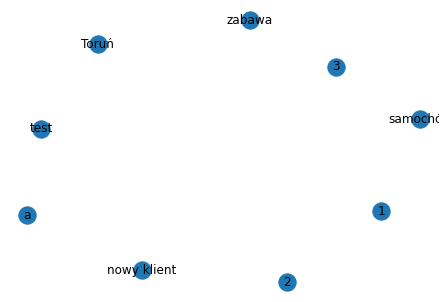

In [69]:
G.add_nodes_from([
    ('nowy klient', {'wzrost':'180', 'wiek':25}),
    ('samochód',{'kolor':'red'})]) #to nie jest kolor na rysunku
nx.draw(G,with_labels=True)

In [70]:
G.nodes

NodeView(('a', 1, 'test', 'zabawa', 'Toruń', 2, 3, 'nowy klient', 'samochód'))

In [71]:
G.nodes['nowy klient']['wzrost']

'180'

In [72]:
G.nodes['samochód']['moc']=100

### Krawędzie

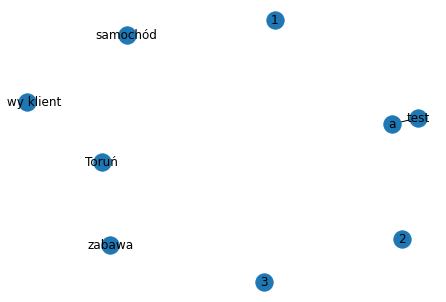

In [73]:
G.add_edge('a','test')
nx.draw(G,with_labels=True)

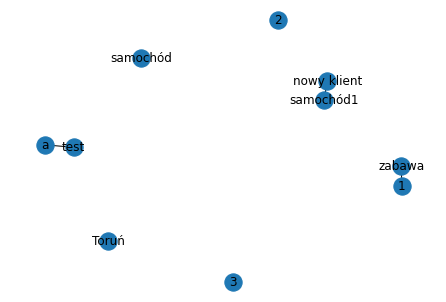

In [74]:
G.add_edges_from([('nowy klient','samochód1'),(1,'zabawa')])
nx.draw(G,with_labels=True)

In [75]:
H=nx.Graph([(1,2),(22,33),(11,33)]) #można szybko dodawać krawędzie bezpośrednio w konstruktorze. Dodają się wtedy też wierzchołki
H.edges

EdgeView([(1, 2), (22, 33), (33, 11)])

In [76]:
H.add_nodes_from(G) #nie przenoszą się krawędzie i atrybuty
print(H.nodes)
print(H.edges)

[1, 2, 22, 33, 11, 'a', 'test', 'zabawa', 'Toruń', 3, 'nowy klient', 'samochód', 'samochód1']
[(1, 2), (22, 33), (33, 11)]


In [77]:
H.add_edges_from(G.edges)
H.edges

EdgeView([(1, 2), (1, 'zabawa'), (22, 33), (33, 11), ('a', 'test'), ('nowy klient', 'samochód1')])

### Usuwanie i modyfikacja

In [78]:
print(f'Liczba krawędzi: {H.number_of_edges()}')

print(f'Liczba wierzchołków: {H.number_of_nodes()}')

Liczba krawędzi: 6
Liczba wierzchołków: 13


In [79]:
H.edges

EdgeView([(1, 2), (1, 'zabawa'), (22, 33), (33, 11), ('a', 'test'), ('nowy klient', 'samochód1')])

In [80]:
H.remove_edge(1,2)

Liczba krawędzi: 5
Liczba wierzchołków: 13


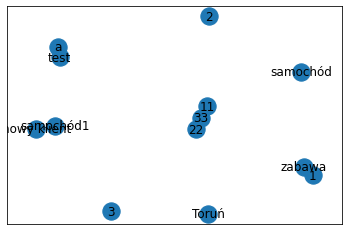

In [81]:
nx.draw_networkx(H)
print(f'Liczba krawędzi: {H.number_of_edges()}')
print(f'Liczba wierzchołków: {H.number_of_nodes()}')

### Inne ważne operacje
* ```H.nodes.data()``` - dane z wierzhołków
* ```add_weighted_edges_from(lista krotek)``` - każda 3-krotka to wierzchołki i waga krawędzi.
* ```nx.DiGraph()``` - tworzenie grafu skierowanego
* ```nx.MultiGraph()``` - tworzenie grafu z wielokrotnymi krawędziami między wierzchołkami
* ```compose(G1,G2)``` - sklejenie dwóch grafów wspólnumi wierzchołkami
* ```G.subgraph([lista wierzchołków])```

### Klasyczne grafy
* K_5=nx.complete_graph(5)
* K_3_5=nx.complete_bipartite_graph(3,5)
* barbell=nx.barbell_graph(10,10)
* lollipop=nx.lollipop_graph(10,20)

In [82]:
G.nodes.data()

NodeDataView({'a': {}, 1: {'weight': 5}, 'test': {}, 'zabawa': {}, 'Toruń': {}, 2: {}, 3: {}, 'nowy klient': {'wzrost': '180', 'wiek': 25}, 'samochód': {'kolor': 'red', 'moc': 100}, 'samochód1': {}})

#### Zadanie:
Stwórz graf skierowany zawierający litery Twojego imienia. Dodaj krawędzie w taki sposób, by ścieżka dawała imię.

### Tworzenie grafów z plików

* .json - typ rozbudowanego słownika
* .csv - dane tabelaryczne; oddzielane przecinkami (domyślnie) w poszczególnych wierszach
* .xlsx (przez pandas) [przykład](https://github.com/Hevenicio/Network-Data-Science-with-NetworkX-and-Python/blob/master/task1.ipynb)
* czytanie różnych typów zapisów grafów



In [83]:
import requests
import json 

data=requests.get('https://raw.githubusercontent.com/danio2010/ON2022/main/tokyo-metro.json').json()


In [84]:
type(data)

dict

In [85]:
print(data.values()) #linie metra

dict_values([{'color': '#149848', 'transfers': [['C3', 'F15'], ['C4', 'Z2'], ['C4', 'G2'], ['C7', 'M14'], ['C7', 'N6'], ['C7', 'G6'], ['C8', 'M15'], ['C8', 'H6'], ['C9', 'H7'], ['C9', 'Y18'], ['C11', 'T9'], ['C11', 'M18'], ['C11', 'Z8'], ['C12', 'M19'], ['C18', 'H21']], 'travel_times': [['C1', 'C2', 2], ['C2', 'C3', 2], ['C3', 'C4', 1], ['C4', 'C5', 2], ['C5', 'C6', 2], ['C6', 'C7', 2], ['C7', 'C8', 1], ['C8', 'C9', 3], ['C9', 'C10', 1], ['C10', 'C11', 2], ['C11', 'C12', 2], ['C12', 'C13', 2], ['C13', 'C14', 2], ['C14', 'C15', 2], ['C15', 'C16', 2], ['C16', 'C17', 3], ['C17', 'C18', 3], ['C18', 'C19', 3]]}, {'color': '#f59230', 'transfers': [['G1', 'Z1'], ['G1', 'F16'], ['G2', 'Z2'], ['G2', 'C4'], ['G4', 'Z3'], ['G5', 'M13'], ['G5', 'Y16'], ['G5', 'Z4'], ['G5', 'N7'], ['G6', 'N6'], ['G6', 'M14'], ['G6', 'C7'], ['G9', 'M16'], ['G9', 'H8'], ['G11', 'T10'], ['G12', 'Z9'], ['G15', 'H16'], ['G16', 'H17']], 'travel_times': [['G1', 'G2', 2], ['G2', 'G3', 1], ['G3', 'G4', 2], ['G4', 'G5', 2], 

In [86]:
data['C']['transfers']

[['C3', 'F15'],
 ['C4', 'Z2'],
 ['C4', 'G2'],
 ['C7', 'M14'],
 ['C7', 'N6'],
 ['C7', 'G6'],
 ['C8', 'M15'],
 ['C8', 'H6'],
 ['C9', 'H7'],
 ['C9', 'Y18'],
 ['C11', 'T9'],
 ['C11', 'M18'],
 ['C11', 'Z8'],
 ['C12', 'M19'],
 ['C18', 'H21']]

In [87]:
metro=nx.Graph()
przesiadki=[]
for linia in data.values():
    przesiadki.extend(linia['transfers'])
#for linia_nazwa in data.keys():
#    przesiadki2.extend(data[linia_nazwa]['transfer'])
polaczenia=[]
for linia in data.values():
    polaczenia.extend(linia['travel_times'])
    
# inny sposób:
from itertools import chain
przesiadki2=list(chain.from_iterable([linia['transfers'] for linia in data.values()]))

In [88]:
polaczenia

[['C1', 'C2', 2],
 ['C2', 'C3', 2],
 ['C3', 'C4', 1],
 ['C4', 'C5', 2],
 ['C5', 'C6', 2],
 ['C6', 'C7', 2],
 ['C7', 'C8', 1],
 ['C8', 'C9', 3],
 ['C9', 'C10', 1],
 ['C10', 'C11', 2],
 ['C11', 'C12', 2],
 ['C12', 'C13', 2],
 ['C13', 'C14', 2],
 ['C14', 'C15', 2],
 ['C15', 'C16', 2],
 ['C16', 'C17', 3],
 ['C17', 'C18', 3],
 ['C18', 'C19', 3],
 ['G1', 'G2', 2],
 ['G2', 'G3', 1],
 ['G3', 'G4', 2],
 ['G4', 'G5', 2],
 ['G5', 'G6', 2],
 ['G6', 'G7', 2],
 ['G7', 'G8', 2],
 ['G8', 'G9', 2],
 ['G9', 'G10', 1],
 ['G10', 'G11', 2],
 ['G11', 'G12', 2],
 ['G12', 'G13', 1],
 ['G13', 'G14', 2],
 ['G14', 'G15', 2],
 ['G15', 'G16', 1],
 ['G16', 'G17', 2],
 ['G17', 'G18', 1],
 ['G18', 'G19', 2],
 ['F1', 'F2', 3],
 ['F2', 'F3', 2],
 ['F3', 'F4', 3],
 ['F4', 'F5', 2],
 ['F5', 'F6', 2],
 ['F6', 'F7', 2],
 ['F7', 'F8', 2],
 ['F8', 'F9', 2],
 ['F9', 'F10', 3],
 ['F10', 'F11', 2],
 ['F11', 'F12', 2],
 ['F12', 'F13', 2],
 ['F13', 'F14', 3],
 ['F14', 'F15', 2],
 ['F15', 'F16', 2],
 ['H1', 'H2', 3],
 ['H2', 'H3',

In [89]:
metro.add_weighted_edges_from(polaczenia,transfer=False) #dodanie krawędzi czasu przejazdu między stacjami
metro.add_edges_from(przesiadki,transfer=True) # dodanie krawędzie z atrybutem między danymi liniami z punktach przesiadki


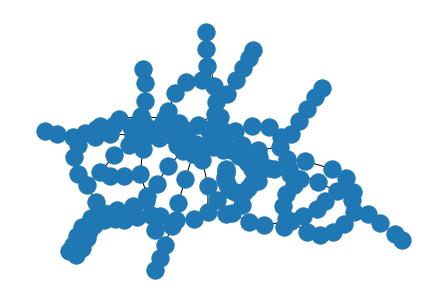

In [90]:
nx.draw(metro)

In [91]:
metro.number_of_nodes()

184

In [92]:
metro.number_of_edges()

243

In [93]:
metro.adj['C3']

AtlasView({'C2': {'transfer': False, 'weight': 2}, 'C4': {'transfer': False, 'weight': 1}, 'F15': {'transfer': True}})

## Rysowanie grafu

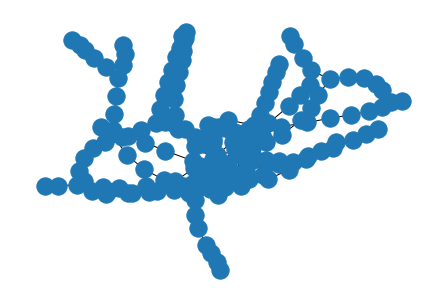

In [94]:
nx.draw(metro)

Mamy dostępne różne tryby (layout) wyświetlania:
* graphviz_layout
* pydot_layout
* circular_layout
* planar_layout
* Itd. [dokumentacja](https://networkx.org/documentation/stable/reference/drawing.html)

In [95]:
# Utworzenie listy kolorów wierzchołków
kolory=[data[stacja[0].upper()]["color"] for stacja in metro.nodes()] #stacja[0] bierze pierwszy znak z nazwy stacji

[]

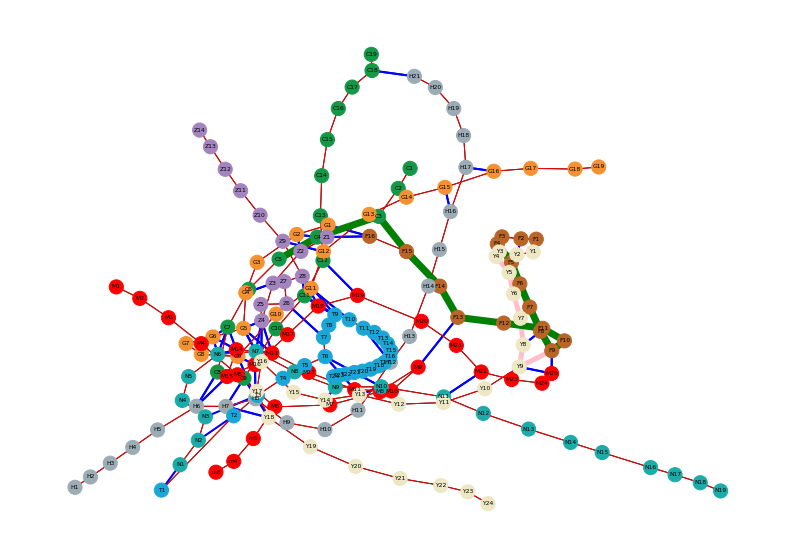

In [130]:
fig,osie=plt.subplots(1,1,figsize=(14,10))
# wybór mapowania pozycji
#pos = nx.drawing.nx_agraph.graphviz_layout(metro, prog="neato")
pos_s = nx.spring_layout(metro)
pos_sh = nx.shell_layout(metro)
pos_c = nx.circular_layout(metro)
pos_sp = nx.spectral_layout(metro)
pozycje=pos_s
nx.draw(metro,pos=pozycje,ax=osie,node_size=200,node_color=kolory) #baza
nx.draw_networkx_labels(metro, pos=pozycje, ax=osie, font_size=6) #labelki
nx.draw_networkx_edges(metro,pos=pozycje,ax=osie,edgelist=przesiadki,width=2,edge_color='blue') #przesiadki
nx.draw_networkx_edges(metro,pos=pozycje,ax=osie,edgelist=polaczenia,edge_color="red") #połączenia

nx.draw_networkx_edges(metro,pos=pozycje,ax=osie,edgelist=najkrotsza,width=5,edge_color="pink")   #z zadania domowego najkrotsza
nx.draw_networkx_edges(metro,pos=pozycje,ax=osie,edgelist=najszybsza,width=7,edge_color="green")   #z zadania domowego najkrótsza

# usuwanie osi
for side in ['bottom','right','top','left']:
    osie.spines[side].set_visible(False)

# usuwanie labelek osi
osie.set_xticks([])
osie.set_yticks([])

## Analiza sieci (grafu)
* ```H.adj[wierzchołek]``` - wierzchołki połączone z danym
* ```H.degree()``` - stopnie wszystkich wierzchołków
* ```H.degree[wierzhołek]``` - stopień wierzchołka
* ```nx.shortest_path(H,w1,w2)``` - najkrótsza ścieżka



Szukamy wierzchołków o największym stopniu

In [97]:
metro.degree()

DegreeView({'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 2, 'C6': 2, 'C7': 5, 'C8': 4, 'C9': 4, 'C10': 2, 'C11': 5, 'C12': 3, 'C13': 2, 'C14': 2, 'C15': 2, 'C16': 2, 'C17': 2, 'C18': 3, 'C19': 1, 'G1': 3, 'G2': 4, 'G3': 2, 'G4': 3, 'G5': 6, 'G6': 5, 'G7': 2, 'G8': 2, 'G9': 4, 'G10': 2, 'G11': 3, 'G12': 3, 'G13': 2, 'G14': 2, 'G15': 3, 'G16': 3, 'G17': 2, 'G18': 2, 'G19': 1, 'F1': 2, 'F2': 3, 'F3': 3, 'F4': 3, 'F5': 3, 'F6': 3, 'F7': 3, 'F8': 3, 'F9': 4, 'F10': 2, 'F11': 2, 'F12': 2, 'F13': 3, 'F14': 2, 'F15': 3, 'F16': 3, 'H1': 1, 'H2': 2, 'H3': 2, 'H4': 2, 'H5': 2, 'H6': 4, 'H7': 4, 'H8': 4, 'H9': 2, 'H10': 2, 'H11': 2, 'H12': 3, 'H13': 2, 'H14': 2, 'H15': 2, 'H16': 3, 'H17': 3, 'H18': 2, 'H19': 2, 'H20': 2, 'H21': 2, 'M1': 1, 'M2': 2, 'M3': 2, 'M4': 2, 'M5': 2, 'M6': 3, 'M7': 2, 'M8': 2, 'M9': 3, 'M10': 2, 'M11': 2, 'M12': 3, 'M13': 6, 'M14': 5, 'M15': 4, 'M16': 4, 'M17': 2, 'M18': 5, 'M19': 3, 'M20': 2, 'M21': 2, 'M22': 3, 'M23': 2, 'M24': 2, 'M25': 3, 'm3': 1, 'm4': 2, 'm5': 2, 'N1': 

In [98]:
d_max = max(d for (n, d) in metro.degree())
d_max

6

#### Zadanie: 
Znajdź wszystkie wierzchołki maksymalnego stopnia

In [99]:
[(n, d) for (n, d) in metro.degree() if d == d_max]

[('G5', 6), ('M13', 6), ('N7', 6), ('Y16', 6), ('Z4', 6)]

#### Zadanie:
Znajdź wszystkie stacje końcowe.

In [100]:
[n for (n, d) in metro.degree() if d == 1]

['C1', 'C19', 'G19', 'H1', 'M1', 'm3', 'N19', 'T24', 'Y24', 'Z14']


#### Zadanie: 
Znajdź najkrótszą i najszybszą ścieżkę między C5 i Y3 i zaznacz je grubymi liniami na grafie

```nx.shortest_path```

In [101]:
stacjenk=nx.shortest_path(metro,'C5','Y3')

najkrotsza=[]
for i in range(len(stacjenk)-1):
  najkrotsza.append([stacjenk[i],stacjenk[i+1]])

In [106]:
stacjenk

['C5',
 'C4',
 'C3',
 'F15',
 'F14',
 'F13',
 'F12',
 'F11',
 'F10',
 'F9',
 'Y9',
 'Y8',
 'Y7',
 'Y6',
 'Y5',
 'Y4',
 'Y3']

In [127]:
stacjens=nx.shortest_path(metro,'C5','Y3',weight='weight')

In [132]:
stacjens

['C5',
 'C4',
 'C3',
 'F15',
 'F14',
 'F13',
 'F12',
 'F11',
 'F10',
 'F9',
 'F8',
 'F7',
 'F6',
 'F5',
 'F4',
 'F3',
 'Y3']

In [128]:
najszybsza=[]
for i in range(len(stacjens)-1):
  najszybsza.append([stacjens[i],stacjens[i+1]])

In [129]:
najszybsza

[['C5', 'C4'],
 ['C4', 'C3'],
 ['C3', 'F15'],
 ['F15', 'F14'],
 ['F14', 'F13'],
 ['F13', 'F12'],
 ['F12', 'F11'],
 ['F11', 'F10'],
 ['F10', 'F9'],
 ['F9', 'F8'],
 ['F8', 'F7'],
 ['F7', 'F6'],
 ['F6', 'F5'],
 ['F5', 'F4'],
 ['F4', 'F3'],
 ['F3', 'Y3']]

Trasy są zaznaczone na rysunku, który powstał na zajęciach

#### Zadanie:
Napisz funkcję obliczającą czas przejazdu po trasie (lista stacji).

In [142]:
def czasprzejazdu(lista):
  czas=0
  for i in range(len(lista)-1):
    czas+=nx.shortest_path_length(metro,lista[i],lista[i+1],weight='weight')
  return czas


#### Zadanie:
Dodaj do krawędzi przesiadkowych wagi (czasy przesiadek) proporcjonalne do iloczynu stopni dwóch wierzchołków ($(w1*w2)/4$) i oblicz wówczas najszybsze przejazdy między 5 parami losowo wybranych stacji.

In [103]:
przesiadki
stopnie=metro.degree()
for el in przesiadki:
  el.append(stopnie[el[0]]*stopnie[el[1]]/4)

In [104]:
przesiadki

[['C3', 'F15', 2.25],
 ['C4', 'Z2', 4.0],
 ['C4', 'G2', 4.0],
 ['C7', 'M14', 6.25],
 ['C7', 'N6', 6.25],
 ['C7', 'G6', 6.25],
 ['C8', 'M15', 4.0],
 ['C8', 'H6', 4.0],
 ['C9', 'H7', 4.0],
 ['C9', 'Y18', 4.0],
 ['C11', 'T9', 6.25],
 ['C11', 'M18', 6.25],
 ['C11', 'Z8', 6.25],
 ['C12', 'M19', 2.25],
 ['C18', 'H21', 1.5],
 ['G1', 'Z1', 2.25],
 ['G1', 'F16', 2.25],
 ['G2', 'Z2', 4.0],
 ['G2', 'C4', 4.0],
 ['G4', 'Z3', 2.25],
 ['G5', 'M13', 9.0],
 ['G5', 'Y16', 9.0],
 ['G5', 'Z4', 9.0],
 ['G5', 'N7', 9.0],
 ['G6', 'N6', 6.25],
 ['G6', 'M14', 6.25],
 ['G6', 'C7', 6.25],
 ['G9', 'M16', 4.0],
 ['G9', 'H8', 4.0],
 ['G11', 'T10', 2.25],
 ['G12', 'Z9', 2.25],
 ['G15', 'H16', 2.25],
 ['G16', 'H17', 2.25],
 ['F1', 'Y1', 1.0],
 ['F2', 'Y2', 2.25],
 ['F3', 'Y3', 2.25],
 ['F4', 'Y4', 2.25],
 ['F5', 'Y5', 2.25],
 ['F6', 'Y6', 2.25],
 ['F7', 'Y7', 2.25],
 ['F8', 'Y8', 2.25],
 ['F9', 'Y9', 4.0],
 ['F9', 'M25', 3.0],
 ['F13', 'M9', 2.25],
 ['F15', 'C3', 2.25],
 ['F16', 'Z1', 2.25],
 ['F16', 'G1', 2.25],
 [

In [136]:
metro.add_weighted_edges_from(przesiadki,transfer=True)

In [137]:
metro.get_edge_data('H21','C18')

{'transfer': True, 'weight': 1.5}

In [151]:
stacje=list(metro.nodes())
stacje

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'G7',
 'G8',
 'G9',
 'G10',
 'G11',
 'G12',
 'G13',
 'G14',
 'G15',
 'G16',
 'G17',
 'G18',
 'G19',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9',
 'F10',
 'F11',
 'F12',
 'F13',
 'F14',
 'F15',
 'F16',
 'H1',
 'H2',
 'H3',
 'H4',
 'H5',
 'H6',
 'H7',
 'H8',
 'H9',
 'H10',
 'H11',
 'H12',
 'H13',
 'H14',
 'H15',
 'H16',
 'H17',
 'H18',
 'H19',
 'H20',
 'H21',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'M10',
 'M11',
 'M12',
 'M13',
 'M14',
 'M15',
 'M16',
 'M17',
 'M18',
 'M19',
 'M20',
 'M21',
 'M22',
 'M23',
 'M24',
 'M25',
 'm3',
 'm4',
 'm5',
 'N1',
 'N2',
 'N3',
 'N4',
 'N5',
 'N6',
 'N7',
 'N8',
 'N9',
 'N10',
 'N11',
 'N12',
 'N13',
 'N14',
 'N15',
 'N16',
 'N17',
 'N18',
 'N19',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T9',
 'T10',
 'T11',
 '

In [152]:
def losowanie():
  a=r.randint(0,len(stacje)-1)
  b=r.randint(0,len(stacje)-1)
  while b==a:
    b=r.randint(0,len(stacje)-1)
  return a,b

In [157]:
for i in range(5):
  a,b=losowanie()
  print(stacje[a],' ', stacje[b], ' ',czasprzejazdu([stacje[a],stacje[b]]))

M3   T19   272.25
Z1   H9   23.25
Y10   F3   18.25
H16   M15   19.25
G10   H5   11.0
